# **Άσκηση 1**: Telephone Touch – Tones

In [166]:
import numpy as np
from IPython.display import Audio, display
from matplotlib import pyplot as plt
from scipy.io import wavfile
import librosa

## 1.1

In [167]:
fs = 8192  # Sampling rate (samples per second)
samples = 1000  # Number of samples

row_freq = np.array([0.9273, 1.0247, 1.1328])
col_freq = np.array([0.5346, 0.5906, 0.6535, 0.7217])

# Since the frequencies are in kHz we need to multiply by 1000
row_freq *= 1000
col_freq *= 1000


# Function to generate the tone for a given key
def generate_tone(col_idx, row_idx):
    row_freq_hz = row_freq[row_idx]
    col_freq_hz = col_freq[col_idx]
    t = np.arange(samples) / fs
    tone = np.sin(2 * np.pi * row_freq_hz * t) + np.sin(2 * np.pi * col_freq_hz * t)
    return tone


keypad = [["1", "2", "3"], ["4", "5", "6"], ["7", "8", "9"], ["*", "0", "#"]]

tones = {}
for i in range(4):
    for j in range(3):
        key = keypad[i][j]
        if key == "*" or key == "#":
            continue
        tones[key] = generate_tone(i, j)

# Play the tone for each key
for key, tone in tones.items():
    print(f"Playing tone for key '{key}'")
    display(Audio(tone, rate=fs))

Playing tone for key '1'


Playing tone for key '2'


Playing tone for key '3'


Playing tone for key '4'


Playing tone for key '5'


Playing tone for key '6'


Playing tone for key '7'


Playing tone for key '8'


Playing tone for key '9'


Playing tone for key '0'


## 1.2

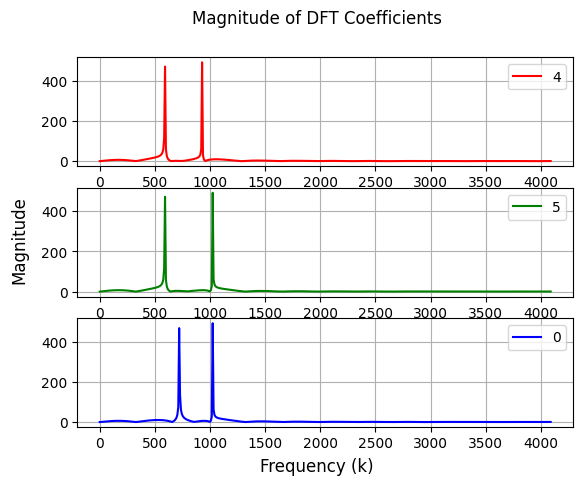

In [168]:
N = 1024
tones_fft = {key: np.abs(np.fft.fft(tone, N))[: N // 2] for key, tone in tones.items()}

fig = plt.figure()
plt.subplot(3, 1, 1)

plt.plot(np.arange(N // 2) * fs / N, tones_fft["4"], label="4", color="red")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(np.arange(N // 2) * fs / N, tones_fft["5"], label="5", color="green")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(np.arange(N // 2) * fs / N, tones_fft["0"], label="0", color="blue")
plt.grid(True)
plt.legend()

fig.supxlabel("Frequency (k)")
fig.supylabel("Magnitude")
plt.suptitle("Magnitude of DFT Coefficients")
plt.show()

Στο σχήμα βλέπουμε για το κάθε ένα κουμπί τα δύο unit impulses που τον περιγράφουν. Ο συνδυασμός είναι μοναδικός και με επαλήθευση βλέπουμε ότι στις συχνότητες που αντιστοιχεί κάθε ψηφίο εκεί γύρο υπάρχει unit impulse.

Επειδή Το DFT είναι συμμετρικό στο μισό του ρυθμού δειγματοληψίας, σχεδιάζουμε το πρώτο μισό των αποτελεσμάτων DFT. Αυτό το ήμισυ του ρυθμού δειγματοληψίας ονομάζεται συχνότητα Nyquist, και είναι η τιμή μέχρι την οποία μπορούμε σωστά να αναπαραστήσουμε το συχνοτικό περιεχόμενο.

## 1.3

Ο αριθμός μητρώου είναι **03019925**

In [169]:
student_ID = "12345678"  # Replace with your student ID

tone_sequence = np.zeros(len(student_ID) * (1000 + 100))

for i, key in enumerate(student_ID):
    tone_sequence[i * 1100 : i * 1100 + 1000] = tones[key]


# Before we write the audio file we need to normalize the tone_sequence to be between -32768 and 32767
# This is required because the wavfile.write function wants integer values
max = np.max(np.abs(tone_sequence))
normalized_tone_sequence = tone_sequence / max * np.iinfo(np.int16).max
normalized_tone_sequence = normalized_tone_sequence.astype(np.int16)

wavfile.write(
    "./solution_data/tone_sequence.wav",
    fs,
    normalized_tone_sequence,
)

print("Tone sequence played directly from 'tone_sequence.wav'")
display(Audio("./solution_data/tone_sequence.wav", rate=fs))

print("Tone sequence played directly from numpy array")
display(Audio(tone_sequence, rate=fs))

Tone sequence played directly from 'tone_sequence.wav'


Tone sequence played directly from numpy array


Όπως βλέπουμε, και στις δύο περιπτώσεις ο ήχος είναι ίδιος. Δημιουργήσαμε ένα array 8800 δειγμάτων και σε κάθε παράθυρο των 1100 δειγμάτων στα πρώτα 1000 δείγματα βάλαμε τις τιμές των τόνων. Μετά για να γράψουμε σωστά το αρχείο έπρεπε να κάνουμε κανονοικοποιήση και ακούγοντας τα δύο φωνητικά όλα έχουν γίνει σωστά.

## 1.4

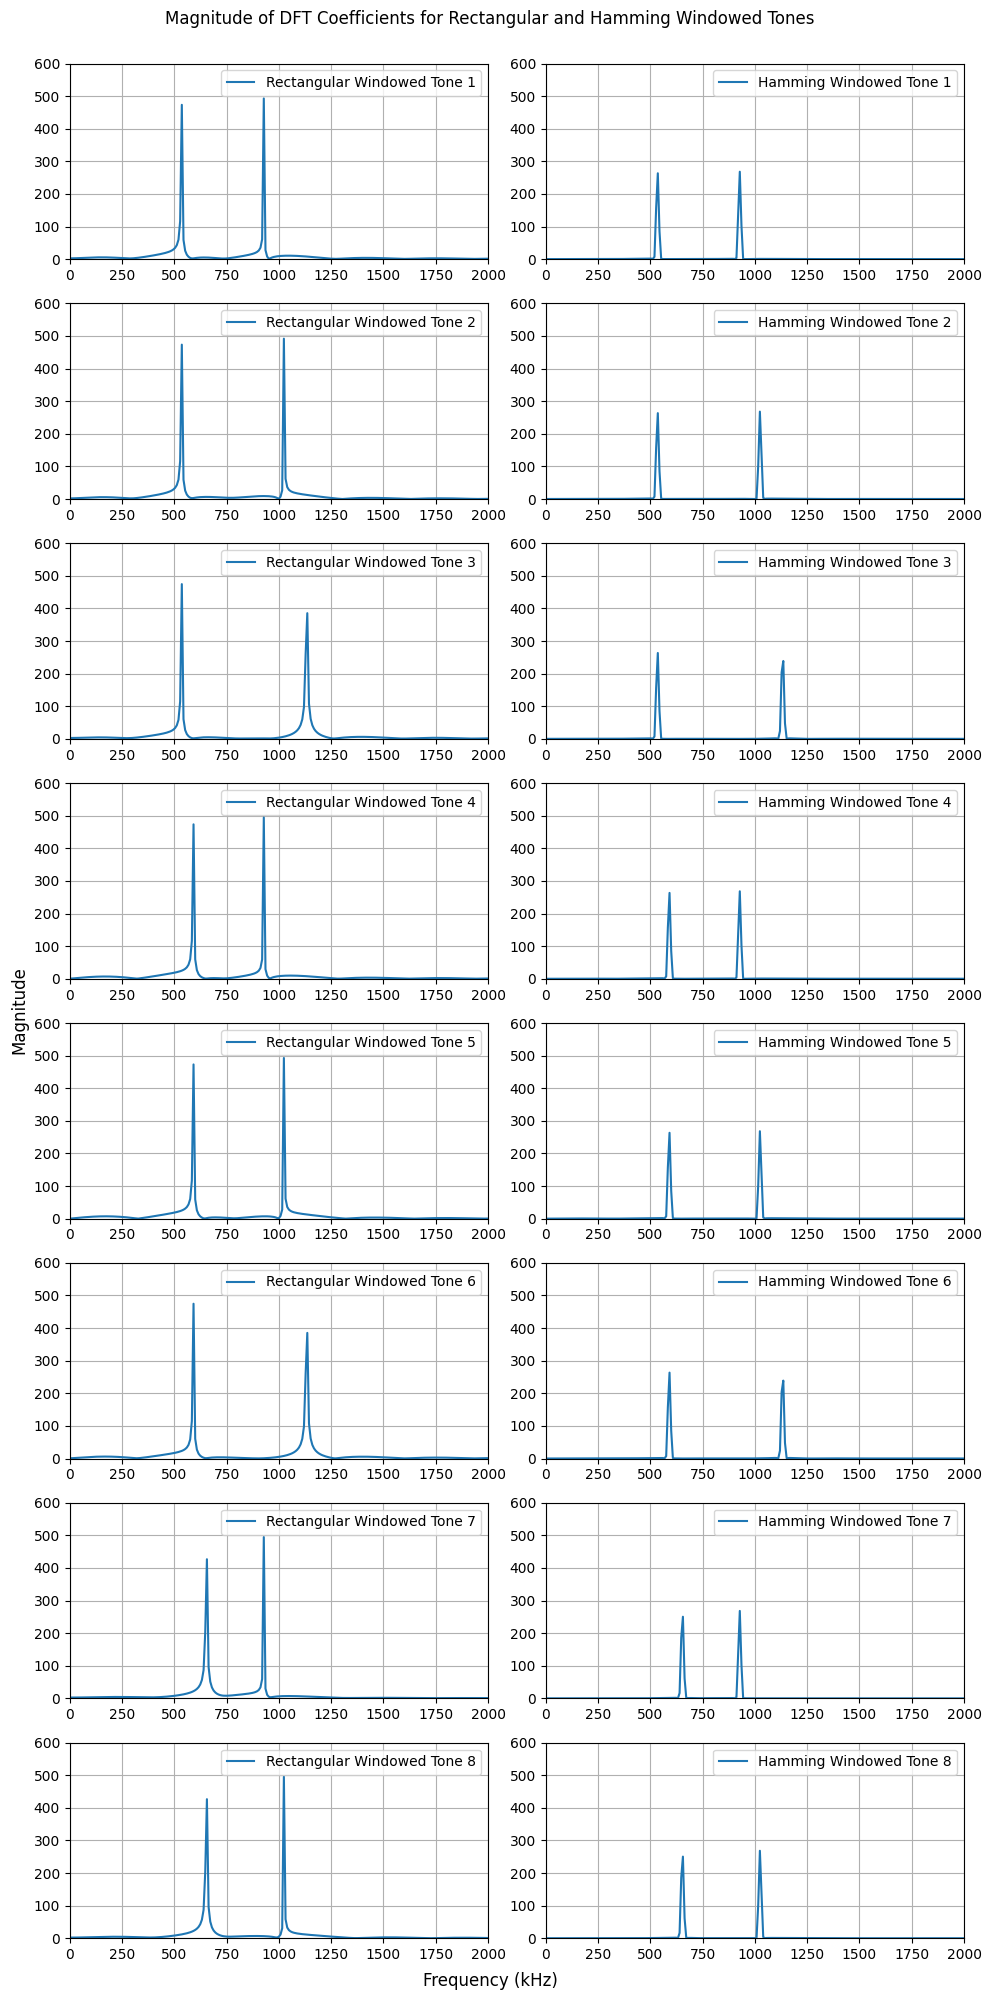

In [170]:
L = 1000
N = 1024

rect_window = np.ones(L)
hamming_window = np.hamming(L)

rect_windowed_tones_fft = []
hamming_windowed_tones_fft = []

for i in range(0, len(tone_sequence), 1100):
    tone = tone_sequence[i : i + L]
    rect_windowed_tone = tone * rect_window
    hamming_windowed_tone = tone * hamming_window

    rect_windowed_tone_fft = np.abs(np.fft.fft(rect_windowed_tone, N))[: N // 2]
    hamming_windowed_tone_fft = np.abs(np.fft.fft(hamming_windowed_tone, N))[: N // 2]

    rect_windowed_tones_fft.append(rect_windowed_tone_fft)
    hamming_windowed_tones_fft.append(hamming_windowed_tone_fft)

fig, ax = plt.subplots(len(rect_windowed_tones_fft), 2, figsize=(10, 20))
fig.suptitle(
    "Magnitude of DFT Coefficients for Rectangular and Hamming Windowed Tones", y=1
)
fig.supxlabel("Frequency (kHz)")
fig.supylabel("Magnitude")
fig.tight_layout()

for i, (rect_windowed_tone_fft, hamming_windowed_tone_fft) in enumerate(
    zip(rect_windowed_tones_fft, hamming_windowed_tones_fft)
):
    ax[i, 0].plot(
        np.arange(N // 2) * fs / N,
        rect_windowed_tone_fft,
        label=f"Rectangular Windowed Tone {i + 1}",
    )
    ax[i, 0].grid(True)
    ax[i, 0].legend()
    ax[i, 0].set_ylim([0, 600])
    ax[i, 0].set_xlim([0, 2000])

    ax[i, 1].plot(
        np.arange(N // 2) * fs / N,
        hamming_windowed_tone_fft,
        label=f"Hamming Windowed Tone {i + 1}",
    )
    ax[i, 1].grid(True)
    ax[i, 1].legend()
    ax[i, 1].set_ylim([0, 600])
    ax[i, 1].set_xlim([0, 2000])


plt.show()

Βλέπουμε ότι με τετραγωνικό παράθυρο το amplitude είναι μεγαλύτερο στον μετασχηματισμό γιατί δεν αλλάζει το αρχικό χρονικό σήμα. Στο hamming βλέπουμε ότι το amplitude είναι μικρότερο λόγω της αλλαγής του αρχικού σήματος αλλά φαίνεται ξεκάθαρα το unit impulse, ακόμα πιο καθαρά και από το τετραγωνικό παράθυρο και για αυτό το hamming είναι πολύ καλό παράθυρο, δεν μας ενδιαφέρει το amplitude γιατί μόνο τις συχνότητες θέλουμε να δούμε στα οποία υπάρχουν peaks.

## 1.5

In [171]:
fs = 8192
duration = 1
N = 1024

frequencies = [k * fs / N for k in range(N // 2)]

touch_tone_freqs = (
    np.array([0.5346, 0.5906, 0.6535, 0.7217, 0.9273, 1.0247, 1.1328]) * 1000
)

min_diff_between_touch_tone_freqs = np.inf

for i in range(1, len(touch_tone_freqs)):
    diff = np.abs(touch_tone_freqs[i] - touch_tone_freqs[i - 1])
    if diff < min_diff_between_touch_tone_freqs:
        min_diff_between_touch_tone_freqs = diff

print(
    f"Minimum difference between touch tone frequencies: {min_diff_between_touch_tone_freqs:.2f}"
)

print(
    "The maximum error in frequency detection taken as 10% of the minimum difference between touch tone frequencies."
)
print(f"Maximum error: {int(min_diff_between_touch_tone_freqs // 10)}")


k_freq_list = []

for k, freq in enumerate(frequencies):
    max_diff = min_diff_between_touch_tone_freqs // 10

    for touch_tone_freq in touch_tone_freqs:
        diff = np.abs(freq - touch_tone_freq)
        if diff < max_diff:
            k_freq_list.append((k, freq))

print("Frequencies and their corresponding k values:")
print(k_freq_list)

Minimum difference between touch tone frequencies: 56.00
The maximum error in frequency detection taken as 10% of the minimum difference between touch tone frequencies.
Maximum error: 5
Frequencies and their corresponding k values:
[(67, 536.0), (74, 592.0), (82, 656.0), (90, 720.0), (116, 928.0), (128, 1024.0), (141, 1128.0), (142, 1136.0)]


## 1.6

In [172]:
# fft of the tones in the tones dictionary
# We will use this to compare with the fft of the tones in the tone sequence
# This was calculated in the previous cells
tones_fft

# This was also calculated in the previous cells
# It is sequence of tones that we generated for student_ID = "03019925"
tone_sequence


def ttdecode(sequence):
    N = 1024
    L = 1000
    decoded_sequence = ""
    for i in range(0, len(sequence), L + 100):
        tone = sequence[i : i + L]
        tone_fft = np.abs(np.fft.fft(tone, N))[: N // 2]

        # We set the error to be infinite so that the first error is always less than it
        min_error = np.inf
        decoded_digit = None

        # We compare the tone_fft with the fft of each tone in the tones dictionary
        # We choose the tone with the minimum error
        # The key of the tone with the minimum error is the decoded digit
        for key in tones.keys():
            error = np.sum((tone_fft - tones_fft[key]) ** 2)
            if error < min_error:
                min_error = error
                decoded_digit = key

        # We add the decoded digit to the decoded_sequence
        decoded_sequence += decoded_digit
    return decoded_sequence


print("The number sequence of the input signal is:", ttdecode(tone_sequence))

The number sequence of the input signal is: 12345678


Εδώ δεν χρησιμοποίησα την μέθοδο στην υπόδειξη, αλλά βγάζει σωστό αποτέλεσμα. Αφού έχουμε έτοιμο το κάθε DFT του κάθε τόνου, απλά βρίσκουμε εκείνο το κουμπί που μας δίνει το μικρότερο σφάλμα σε σχέση με άλλα. Η διαφορά των DFT μεταξύ του παραθύρου της εισόδου και του τόνου που αντιστοιχεί σε κάποιο κουμπί να δίνει την μικρότερο σφάλμα. Ελάχιστο τετραγωνικό σφάλμα.

## 1.7

In [173]:
def ttdecode(sequence):
    # Define the frequencies corresponding to each digit on the telephone keypad
    digit_freqs = {
        "1": [0.697, 1.209],
        "2": [0.697, 1.336],
        "3": [0.697, 1.477],
        "4": [0.770, 1.209],
        "5": [0.770, 1.336],
        "6": [0.770, 1.477],
        "7": [0.852, 1.209],
        "8": [0.852, 1.336],
        "9": [0.852, 1.477],
        "0": [0.941, 1.336],
    }

    # Multiplying by 1000 to convert the frequencies to Hz
    digit_freqs = {key: np.array(value) * 1000 for key, value in digit_freqs.items()}

    decoded_sequence = ""

    for i in range(0, len(sequence), 1100):
        tone = sequence[i : i + 1000]
        tone_fft = np.abs(np.fft.fft(tone, 1024))[: 1024 // 2]
        energy = np.abs(tone_fft) ** 2

        # We find index of the maximum value in the energy array
        max_index = np.argmax(energy)
        # Calculating the frequency corresponding to the maximum value
        first_freq = max_index * fs / N
        # We set to zero the frequencies around the maximum frequency
        energy[max_index - 10 : max_index + 10] = 0
        # We find and calculate the frequency corresponding to the second peak
        second_freq = np.argmax(energy) * fs / N

        freq_combination = sorted([first_freq, second_freq])

        for key, freqs in digit_freqs.items():
            if np.allclose(freqs, freq_combination, atol=5):
                decoded_sequence += key

    return decoded_sequence


easy_sig = np.load("exercise_data/easy_sig.npy")
medium_sig = np.load("exercise_data/medium_sig.npy")
hard_sig = np.load("exercise_data/hard_sig.npy")

digits_easy = ttdecode(easy_sig)
digits_medium = ttdecode(medium_sig)
digits_hard = ttdecode(hard_sig)

print("Number of samples in easy signal is:", len(easy_sig))
print("Number of samples in medium signal is:", len(medium_sig))
print("Number of samples in hard signal is:", len(hard_sig))

print("The number sequence of the easy signal is:", digits_easy)
print("The number sequence of the medium signal is:", digits_medium)
print("The number sequence of the hard signal is:", digits_hard)

Number of samples in easy signal is: 8700
Number of samples in medium signal is: 11225
Number of samples in hard signal is: 10975
The number sequence of the easy signal is: 93926848
The number sequence of the medium signal is: 27332542544
The number sequence of the hard signal is: 6926319910


Για κάποιο λόγω τα touch tone frequencies είναι διαφορετικά από αυτά που μας δώσατε και δεν μπορώ να καταλάβω γιατί, μάλλον κάνατε λάθος. Χρειάστηκε να ξαναφτιάξω την συνάρτηση ttdecode γιατί το προηγούμενο δεν δούλευε, άμα η προηγούμενη υλοποίηση δεν σας άρεσε, βαθμολογίστε αυτό.

Επίσης το length του κάθε signal δεν είναι πολλαπλάσιο του 1100, 1000 για τον τόνο και 100 για τα μηδέν. Και αυτό δεν μου άρεσε.

Τις τιμές των touch tone frequencies τις νέες πήρα από το [wikipedia](https://en.wikipedia.org/wiki/DTMF)

# Άσκηση 2: Χαρακτηριστικά Βραχέος Χρόνου Σημάτων Φωνής και Μουσικής

## 2.1

(0.0, 1.7471875)

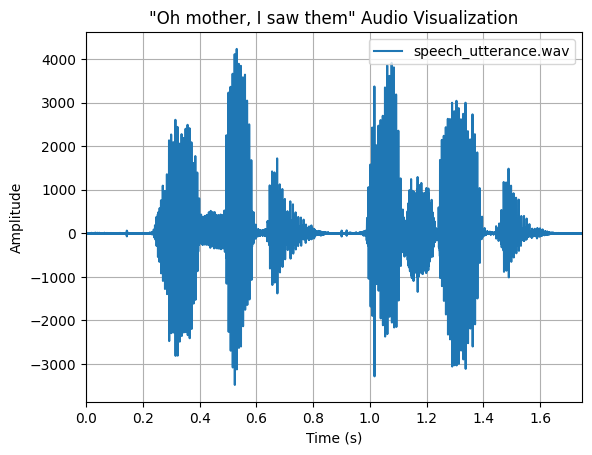

In [174]:
fs, speech_utterance = wavfile.read("exercise_data/speech_utterance.wav")

t = np.arange(len(speech_utterance)) / fs

fig = plt.figure()
plt.plot(t, speech_utterance, label="speech_utterance.wav")
plt.title('"Oh mother, I saw them" Audio Visualization')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.xlim([0, t[-1]])

## 2.2

Δημιουργούμε τις συναρτήσεις

In [175]:
# Short-term energy function
def E_n(signal, window):
    energy = np.abs(signal) ** 2

    # Padding the energy and the window with zeros
    padded_energy = np.pad(energy, (0, len(window)), mode="constant")
    padded_window = np.pad(window, (0, len(energy)), mode="constant")

    # Computing DFT of the signal and the window
    energy_fft = np.fft.fft(padded_energy)
    window_fft = np.fft.fft(padded_window)

    # Convolution in time-domain is multiplication in frequency domain
    return np.abs(np.fft.ifft(energy_fft * window_fft))


# Short-term zero-crossing rate function
def Z_n(signal, window):
    sgns = np.sign(signal)
    sgns_diff = np.abs(np.diff(sgns))

    # Padding the sgns_diff and the window with zeros
    padded_sgns_diff = np.pad(sgns_diff, (0, len(window)), mode="constant")
    padded_window = np.pad(window, (0, len(sgns_diff)), mode="constant")

    # Computing DFT of the signal and the window
    sgns_diff_fft = np.fft.fft(padded_sgns_diff)
    window_fft = np.fft.fft(padded_window)

    # Convolution in time-domain is multiplication in frequency domain
    return np.real(np.fft.ifft(sgns_diff_fft * window_fft))

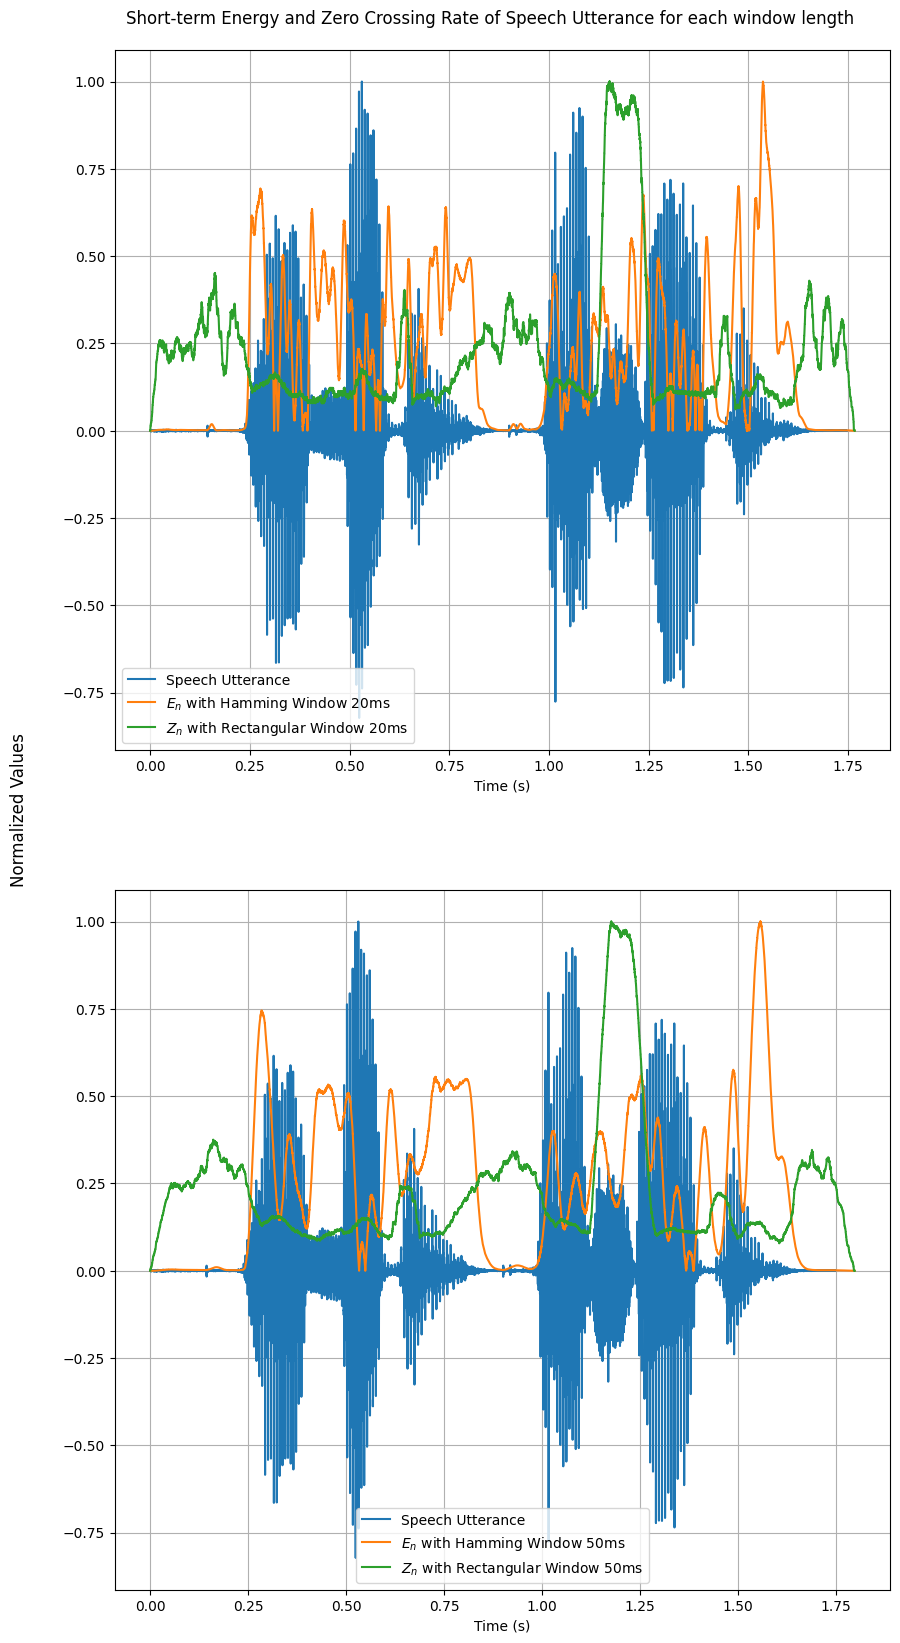

In [176]:
# Creating the windows for 20ms and 50ms
hamming_window_20ms = np.hamming(int(0.02 * fs))
hamming_window_50ms = np.hamming(int(0.05 * fs))

rect_window_20ms = np.ones(int(0.02 * fs))
rect_window_50ms = np.ones(int(0.05 * fs))

# Calculating the short-term energy and zero-crossing rate for the speech utterance
E_n_signal_hamming_20ms = E_n(speech_utterance, hamming_window_20ms)
E_n_signal_hamming_50ms = E_n(speech_utterance, hamming_window_50ms)

Z_n_signal_rect_20ms = Z_n(speech_utterance, rect_window_20ms)
Z_n_signal_rect_50ms = Z_n(speech_utterance, rect_window_50ms)

# Normalizing the signals between 0 and 1
normalize_range = (0, 1)

speech_utterance_normalized = speech_utterance / np.max(np.abs(speech_utterance))

E_n_signal_hamming_20ms_normalized = E_n_signal_hamming_20ms / np.max(
    np.abs(E_n_signal_hamming_20ms)
)
E_n_signal_hamming_50ms_normalized = E_n_signal_hamming_50ms / np.max(
    np.abs(E_n_signal_hamming_50ms)
)
Z_n_signal_rect_20ms_normalized = Z_n_signal_rect_20ms / np.max(
    np.abs(Z_n_signal_rect_20ms)
)
Z_n_signal_rect_50ms_normalized = Z_n_signal_rect_50ms / np.max(
    np.abs(Z_n_signal_rect_50ms)
)


# Calculating the time axis for the signals
t_E_n_hamming_20ms = np.arange(len(E_n_signal_hamming_20ms)) / fs
t_E_n_hamming_50ms = np.arange(len(E_n_signal_hamming_50ms)) / fs
t_Z_n_rect_20ms = np.arange(len(Z_n_signal_rect_20ms)) / fs
t_Z_n_rect_50ms = np.arange(len(Z_n_signal_rect_50ms)) / fs


fig, ax = plt.subplots(2, 1, figsize=(10, 20))
fig.suptitle(
    "Short-term Energy and Zero Crossing Rate of Speech Utterance for each window length",
    y=0.9,
)
fig.supylabel("Normalized Values")

ax[0].plot(t, speech_utterance_normalized, label="Speech Utterance")
ax[0].plot(
    t_E_n_hamming_20ms,
    E_n_signal_hamming_20ms_normalized,
    label="$E_{n}$ with Hamming Window 20ms",
)
ax[0].plot(
    t_Z_n_rect_20ms,
    Z_n_signal_rect_20ms_normalized,
    label="$Z_{n}$ with Rectangular Window 20ms",
)
ax[0].set_xlabel("Time (s)")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, speech_utterance_normalized, label="Speech Utterance")
ax[1].plot(
    t_E_n_hamming_50ms,
    E_n_signal_hamming_50ms_normalized,
    label="$E_{n}$ with Hamming Window 50ms",
)
ax[1].plot(
    t_Z_n_rect_50ms,
    Z_n_signal_rect_50ms_normalized,
    label="$Z_{n}$ with Rectangular Window 50ms",
)
ax[1].set_xlabel("Time (s)")
ax[1].legend()
ax[1].grid(True)

plt.show()

Αυξάνοντας το window length βλέπουμε οτι η συνάρτηση γίνεται πιο smooth. Η ενέργια αρχίζει να μεγαλώνει με το που αρχίζει ο άνθρωπος να μιλάει. Όμως κάπου υπάρχει λάθος στην συνάρτηση της ενέργειας και δεν το βρίσκω.

Η φωνητική ομιλία (όπως τα φωνήεντα) τείνει να έχει χαμηλό ρυθμό μηδενικής διέλευσης επειδή το σήμα είναι πιο κανονικό και αλλάζει το πρόσημο λιγότερο συχνά. Η μη φωνητική ομιλία (όπως τα σύμφωνα) τείνει να έχει υψηλό ρυθμό μηδενικής διέλευσης επειδή το σήμα είναι πιο χαοτικό και αλλάζει το σήμα πιο συχνά.


## 2.3

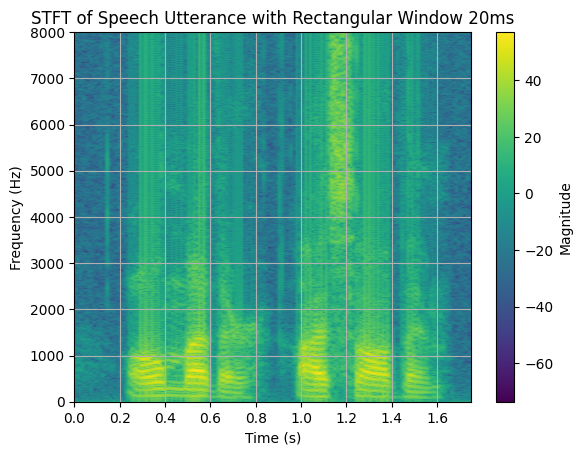

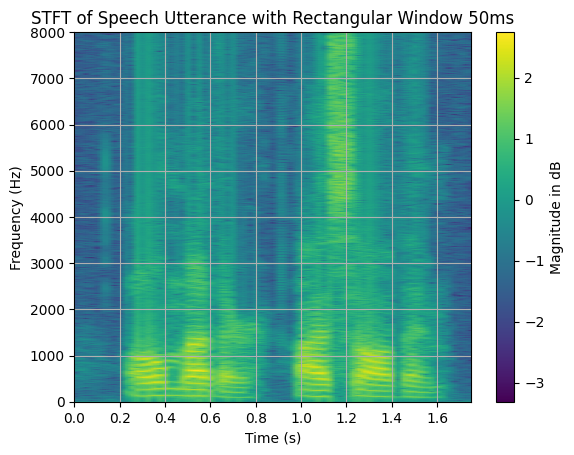

In [177]:
from scipy.signal import stft

stft_speech_utterance_20ms = stft(
    speech_utterance,
    fs,
    window=rect_window_20ms,
    nfft=2048,
    nperseg=len(rect_window_20ms),
)

fig = plt.figure()
plt.pcolormesh(
    stft_speech_utterance_20ms[1],
    stft_speech_utterance_20ms[0],
    20 * np.log10(np.abs(stft_speech_utterance_20ms[2])),
    shading="gouraud",
)
plt.title("STFT of Speech Utterance with Rectangular Window 20ms")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude")
plt.grid(True)
plt.show()


stft_speech_utterance_50ms = stft(
    speech_utterance,
    fs,
    window=rect_window_50ms,
    nfft=2048,
    nperseg=len(rect_window_50ms),
)

fig = plt.figure()
plt.pcolormesh(
    stft_speech_utterance_50ms[1],
    stft_speech_utterance_50ms[0],
    np.log10(np.abs(stft_speech_utterance_50ms[2])),
    shading="gouraud",
)
plt.title("STFT of Speech Utterance with Rectangular Window 50ms")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude in dB")
plt.grid(True)
plt.show()


Το ένταση του χρώματος δείχνει το πλάτος του σήματος σε συγκεκριμένο χρόνο και συχνότητα.

Το φασματικό κέντρο τείνει να αυξάνεται με μεγαλύτερα μήκη παραθύρων, υποδεικνύοντας μια μετατόπιση προς υψηλότερες συχνότητες.
Η φασματική ροή τείνει να μειώνεται με μεγαλύτερα μήκη παραθύρων, υποδεικνύοντας μικρότερη αλλαγή στο φασματικό περιεχόμενο μεταξύ των πλαισίων.

# Άσκηση 3: Ψηφιακή Επεξεργασία και Φασματική Ανάλυση Βιοσημάτων Κητωδών

## 3.1

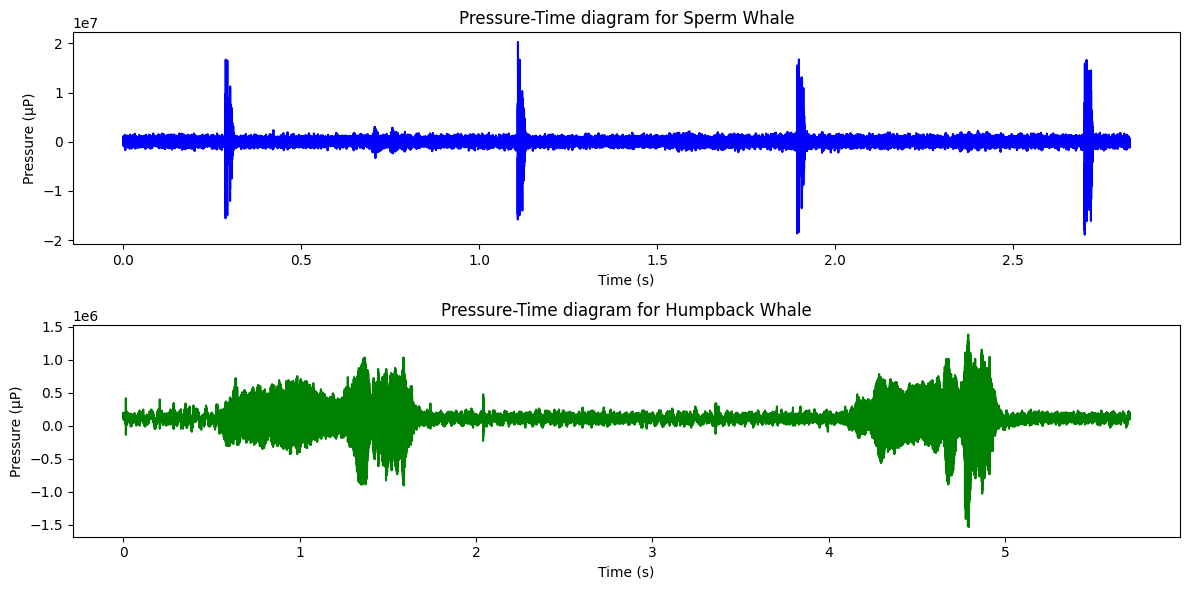

In [178]:
# Function to convert voltage signal to pressure signal
def voltage_to_pressure(voltage_signal, gain_factor=0.16, sensitivity=-155):
    pressure_signal = 3.5 * voltage_signal * gain_factor / (10 ** (sensitivity / 20))
    return pressure_signal


# Load the WAV files
sperm_whale_file = "./exercise_data/85005006.wav"
humpback_whale_file = "./exercise_data/9220100Q.wav"

# Load the audio files
sperm_whale_signal, sr_sperm_whale = librosa.load(sperm_whale_file, sr=None)
humpback_whale_signal, sr_humpback_whale = librosa.load(humpback_whale_file, sr=None)

# Convert voltage signals to pressure signals
pressure_sperm_whale = voltage_to_pressure(sperm_whale_signal)
pressure_humpback_whale = voltage_to_pressure(humpback_whale_signal)

# Create time arrays for plotting
time_sperm_whale = np.linspace(
    0, len(pressure_sperm_whale) / sr_sperm_whale, len(pressure_sperm_whale)
)
time_humpback_whale = np.linspace(
    0, len(pressure_humpback_whale) / sr_humpback_whale, len(pressure_humpback_whale)
)

# Plot Pressure-Time diagrams
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_sperm_whale, pressure_sperm_whale, color="blue")
plt.title("Pressure-Time diagram for Sperm Whale")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")

plt.subplot(2, 1, 2)
plt.plot(time_humpback_whale, pressure_humpback_whale, color="green")
plt.title("Pressure-Time diagram for Humpback Whale")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")

plt.tight_layout()
plt.show()


## 3.2

In [179]:
# Function to calculate RMS pressure
def calculate_rms_pressure(pressure_signal):
    rms_pressure = np.sqrt(np.mean(pressure_signal**2))
    return rms_pressure


# Function to calculate SPL in dB
def calculate_spl(rms_pressure, pref=1e-6):
    spl = 20 * np.log10(rms_pressure / pref)
    return spl


# Calculate RMS pressure for Sperm whale and Humpback whale
rms_pressure_sperm_whale = calculate_rms_pressure(pressure_sperm_whale)
rms_pressure_humpback_whale = calculate_rms_pressure(pressure_humpback_whale)

# Calculate SPL for Sperm whale and Humpback whale
spl_sperm_whale = calculate_spl(rms_pressure_sperm_whale)
spl_humpback_whale = calculate_spl(rms_pressure_humpback_whale)

print("Sperm Whale:")
print("RMS Pressure:", rms_pressure_sperm_whale, "µPa")
print("SPL:", spl_sperm_whale, "dB")

print("\nHumpback Whale:")
print("RMS Pressure:", rms_pressure_humpback_whale, "µPa")
print("SPL:", spl_humpback_whale, "dB")


Sperm Whale:
RMS Pressure: 784971.1 µPa
SPL: 237.8970736321329 dB

Humpback Whale:
RMS Pressure: 195801.56 µPa
SPL: 225.83632306317492 dB


# 3.3

In [180]:
pressure_sperm_whale
pressure_sperm_whale_fft = np.fft.fft(pressure_sperm_whale)


pressure_sperm_whale_power = np.sum(np.abs(pressure_sperm_whale) ** 2)
pressure_sperm_whale_fft_power = np.sum(np.abs(pressure_sperm_whale_fft) ** 2) / len(
    pressure_sperm_whale_fft
)

print("Power of the Sperm Whale Signal In Time Domain:", pressure_sperm_whale_power)
print(
    "Power of the Sperm Whale Signal In Frequency Domain:",
    pressure_sperm_whale_fft_power,
)


Power of the Sperm Whale Signal In Time Domain: 1.4267764e+17
Power of the Sperm Whale Signal In Frequency Domain: 1.4267763202167112e+17


Βλέπουμε ότι το θεώρημα του Parseval ισχύει γιατί οι τιμές είναι παρα πολύ κοντά.

## 3.4

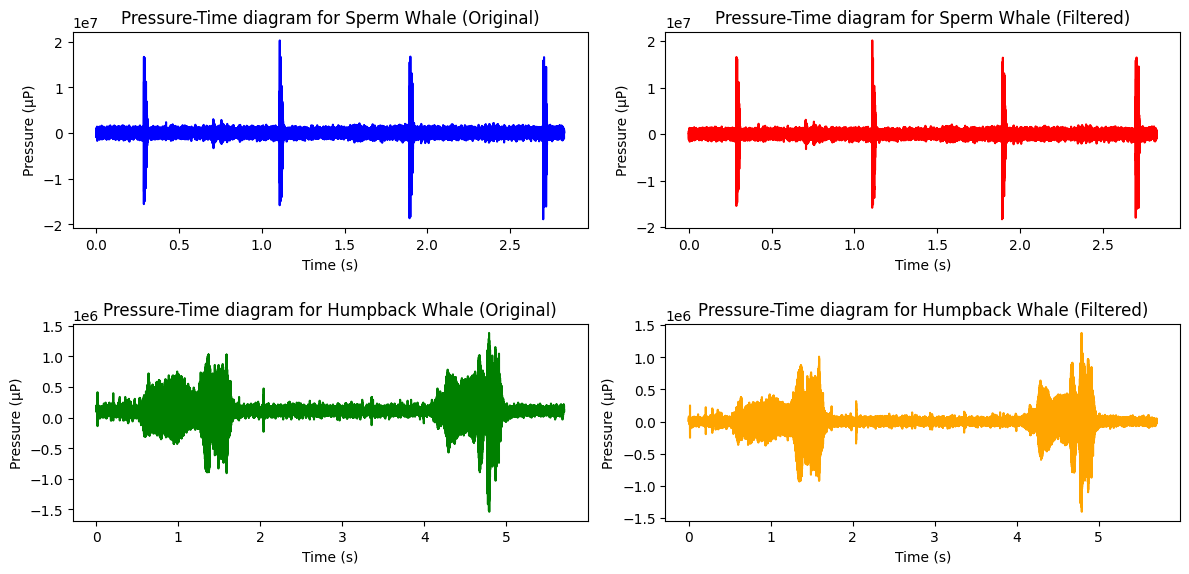

In [181]:
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


# Function to design a Butterworth bandpass filter
def butter_bandpass_filter(lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return b, a


# Function to apply Butterworth filter to a signal
def apply_butterworth_filter(signal, b, a):
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal


# Define the cutoff frequency
lowcut = 200  # Hz
highcut = 22050  # Nyquist frequency (half of the sampling rate)

# Design the Butterworth filter
b, a = butter_bandpass_filter(lowcut, highcut, sr_sperm_whale, order=3)

# Apply the Butterworth filter to the signals
filtered_pressure_sperm_whale = apply_butterworth_filter(pressure_sperm_whale, b, a)
filtered_pressure_humpback_whale = apply_butterworth_filter(
    pressure_humpback_whale, b, a
)

# Plot Pressure-Time diagrams before and after applying the Butterworth filter
plt.figure(figsize=(12, 6))

# Sperm whale
plt.subplot(2, 2, 1)
plt.plot(time_sperm_whale, pressure_sperm_whale, color="blue")
plt.title("Pressure-Time diagram for Sperm Whale (Original)")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")

plt.subplot(2, 2, 2)
plt.plot(time_sperm_whale, filtered_pressure_sperm_whale, color="red")
plt.title("Pressure-Time diagram for Sperm Whale (Filtered)")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")

# Humpback whale
plt.subplot(2, 2, 3)
plt.plot(time_humpback_whale, pressure_humpback_whale, color="green")
plt.title("Pressure-Time diagram for Humpback Whale (Original)")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")

plt.subplot(2, 2, 4)
plt.plot(time_humpback_whale, filtered_pressure_humpback_whale, color="orange")
plt.title("Pressure-Time diagram for Humpback Whale (Filtered)")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")

plt.tight_layout()
plt.show()


## 3.5

In [182]:
# Loading the audio file for anthropogenic noise
pile_driving_file = "./exercise_data/Pile driving.wav"
pile_driving_signal, sr_pile_driving = librosa.load(pile_driving_file, sr=None)

# Convert voltage signal to pressure signal
pressure_pile_driving = voltage_to_pressure(
    voltage_signal=pile_driving_signal, gain_factor=0.16, sensitivity=-175
)

# Calculate RMS pressure for anthropogenic noise
rms_pressure_pile_driving = calculate_rms_pressure(pressure_pile_driving)

# Calculate SPL for anthropogenic noise
spl_pile_driving = calculate_spl(rms_pressure_pile_driving)

# Define frequency range for largest whales (300 Hz to 3 kHz)
f_lower = 300  # Hz
f_higher = 3000  # Hz

# Check if the anthropogenic noise falls within the frequency range of interest
if f_lower <= sr_pile_driving / 2 and f_higher <= sr_pile_driving / 2:
    print("Anthropogenic noise falls within the frequency range of interest.")

# Check if the SPL of anthropogenic noise exceeds the threshold for affecting cetacean behavior
if spl_pile_driving > 100:
    print(
        "The SPL of the anthropogenic noise exceeds 100 dB relative to 1µPa, which might affect cetacean behavior."
    )
else:
    print(
        "The SPL of the anthropogenic noise does not exceed 100 dB relative to 1µPa, so it may not significantly affect cetacean behavior."
    )


Anthropogenic noise falls within the frequency range of interest.
The SPL of the anthropogenic noise exceeds 100 dB relative to 1µPa, which might affect cetacean behavior.


Ο ανθρώπινος είχος είναι περιλαμβάνει τις συχνότητες από 300 μέχρι 3000 Ηz και αφού το SPL είναι μεγαλύτερο του 100dB, οι φάλενες επηρεάζονται.

## 3.6

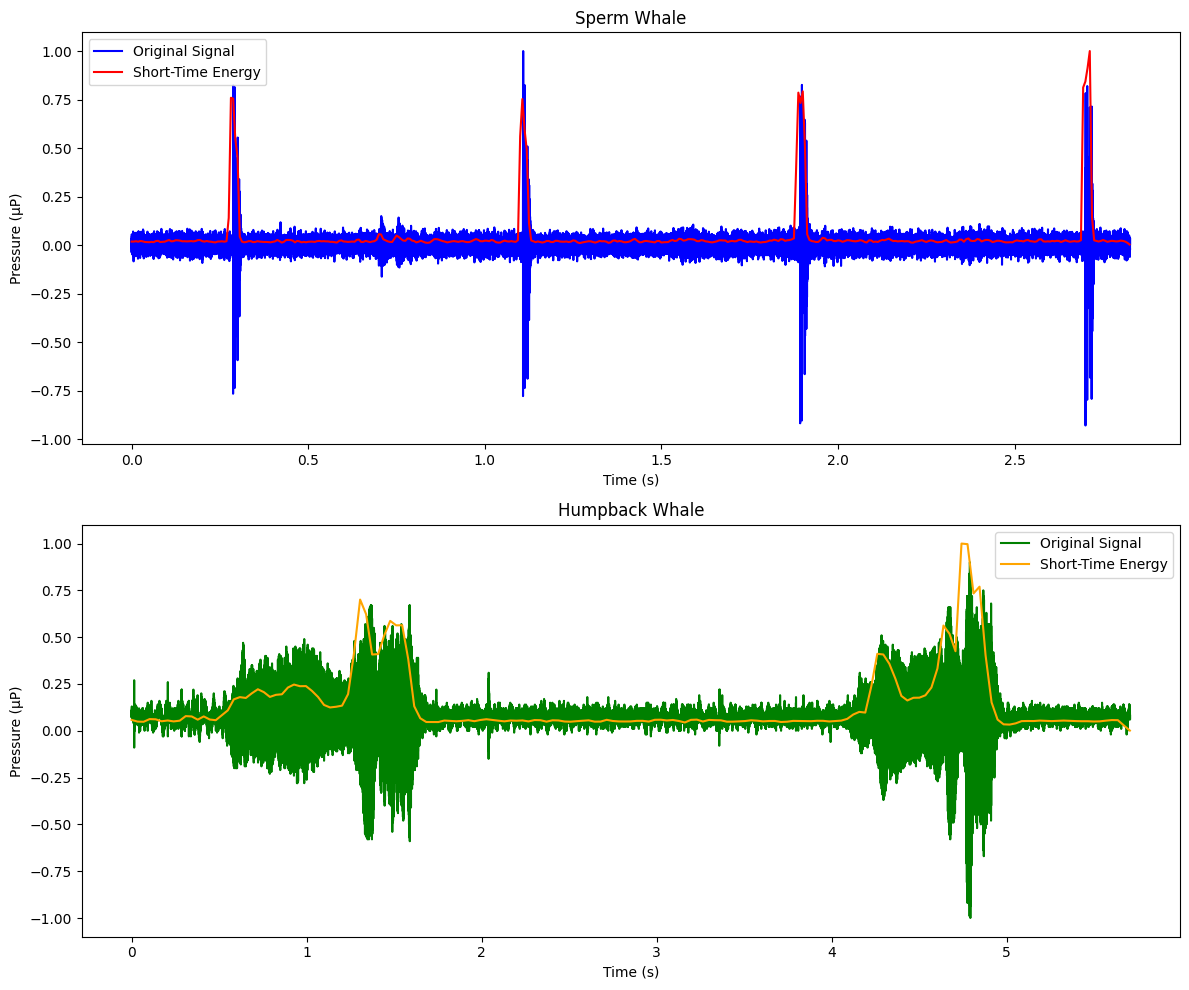

In [183]:
# Function to compute Short-Time Energy (STE)
def compute_ste(signal, frame_length, hop_length):
    num_frames = int(np.ceil(len(signal) / hop_length))
    ste = np.zeros(num_frames)

    for i in range(num_frames):
        start = i * hop_length
        end = min(start + frame_length, len(signal))
        frame = signal[start:end]
        ste[i] = np.sum(frame**2)

    return ste


# Define parameters for Short-Time Energy calculation
frame_length = 1024  # Length of each frame (in samples)
hop_length = 512  # Hop length between frames (in samples)

# Compute Short-Time Energy for both signals
ste_sperm_whale = compute_ste(pressure_sperm_whale, frame_length, hop_length)
ste_humpback_whale = compute_ste(pressure_humpback_whale, frame_length, hop_length)

# Create time arrays for plotting STE
time_ste_sperm_whale = np.arange(len(ste_sperm_whale)) * hop_length / sr_sperm_whale
time_ste_humpback_whale = (
    np.arange(len(ste_humpback_whale)) * hop_length / sr_humpback_whale
)

# Plot original Pressure-Time signals and Short-Time Energy
plt.figure(figsize=(12, 10))

# Sperm whale
plt.subplot(2, 1, 1)
plt.plot(
    time_sperm_whale,
    pressure_sperm_whale / np.max(np.abs(pressure_sperm_whale)),
    color="blue",
    label="Original Signal",
)
plt.plot(
    time_ste_sperm_whale,
    ste_sperm_whale / np.max(np.abs(ste_sperm_whale)),
    color="red",
    label="Short-Time Energy",
)
plt.title("Sperm Whale")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")
plt.legend()

# Humpback whale
plt.subplot(2, 1, 2)
plt.plot(
    time_humpback_whale,
    pressure_humpback_whale / np.max(np.abs(pressure_humpback_whale)),
    color="green",
    label="Original Signal",
)
plt.plot(
    time_ste_humpback_whale,
    ste_humpback_whale / np.max(np.abs(ste_humpback_whale)),
    color="orange",
    label="Short-Time Energy",
)
plt.title("Humpback Whale")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")
plt.legend()

plt.tight_layout()
plt.show()


Όπως περιμέναμε η ενέργεια αυξάνεται όταν το πλάσμα αρχίζει να βγάζει ήχους.

Τα αρχικά σήματα πίεσης-χρόνου δείχνουν τη διακύμανση της πίεσης με την πάροδο του χρόνου και για τα δύο είδη φαλαινών.
Η Ενέργεια Μικρού Χρόνου αντιπροσωπεύει την κατανομή ενέργειας σε βάθος χρόνου, υποδεικνύοντας τμήματα υψηλής και χαμηλής ενέργειας στα σήματα.
Η σύγκριση των αρχικών σημάτων με τις γραφικές παραστάσεις ενέργειας βραχείας διάρκειας βοηθάει στον εντοπισμό περιόδων υψηλής δραστηριότητας ή έντασης στα σήματα. Στην επικοινωνία των θαλάσσιων θηλαστικών, τέτοιες περίοδοι μπορεί να αντιστοιχούν σε συγκεκριμένες φωνές ή γεγονότα συμπεριφοράς.

## 3.7

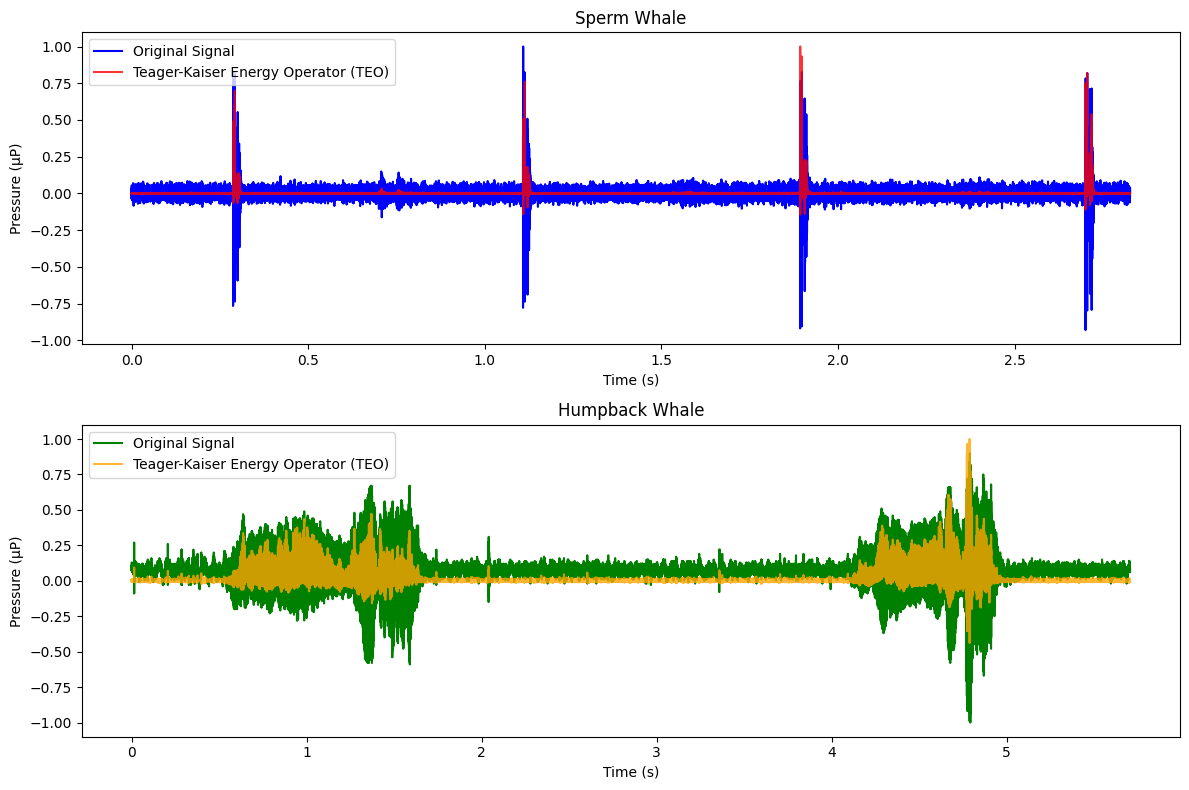

In [184]:
# Function to compute Teager-Kaiser Energy Operator (TEO)
def compute_teo(signal):
    teo = np.zeros_like(signal)

    for i in range(1, len(signal) - 1):
        teo[i] = signal[i] ** 2 - signal[i - 1] * signal[i + 1]

    return teo


# Compute TEO for both signals
teo_sperm_whale = compute_teo(pressure_sperm_whale)
teo_humpback_whale = compute_teo(pressure_humpback_whale)

# Plot original Pressure-Time signals and TEO
plt.figure(figsize=(12, 8))

# Sperm whale
plt.subplot(2, 1, 1)
plt.plot(
    time_sperm_whale,
    pressure_sperm_whale / np.max(np.abs(pressure_sperm_whale)),
    color="blue",
    label="Original Signal",
)
plt.plot(
    time_sperm_whale,
    teo_sperm_whale / np.max(np.abs(teo_sperm_whale)),
    color="red",
    label="Teager-Kaiser Energy Operator (TEO)",
    alpha=0.8,
)
plt.title("Sperm Whale")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")
plt.legend()

# Humpback whale
plt.subplot(2, 1, 2)
plt.plot(
    time_humpback_whale,
    pressure_humpback_whale / np.max(np.abs(pressure_humpback_whale)),
    color="green",
    label="Original Signal",
)
plt.plot(
    time_humpback_whale,
    teo_humpback_whale / np.max(np.abs(teo_humpback_whale)),
    color="orange",
    label="Teager-Kaiser Energy Operator (TEO)",
    alpha=0.8,
)
plt.title("Humpback Whale")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (µP)")
plt.legend()

plt.tight_layout()
plt.show()


Η Ενέργεια Μικρού Χρόνου (STE) αντιπροσωπεύει το συνολικό επίπεδο ενέργειας εντός σύντομων χρονικών πλαισίων του σήματος, δίνοντας μια ένδειξη της έντασης του σήματος με την πάροδο του χρόνου. Αντίθετα, το Teager-Kaiser Energy Operator (TEO) δίνει έμφαση στις διακυμάνσεις της ενέργειας που σχετίζονται με γρήγορες αλλαγές ή ταλαντώσεις στο σήμα.

Το TEO είναι πιο ευαίσθητο σε γρήγορες αλλαγές ή ταλαντώσεις στο σήμα σε σύγκριση με το STE. Αυτό συμβαίνει επειδή το TEO ενσωματώνει ρητά τη διαφορά μεταξύ γειτονικών δειγμάτων.

Ενώ το STE παρέχει μια ομαλή αναπαράσταση της ενέργειας με την πάροδο του χρόνου λόγω του μέσου όρου του αποτελέσματος σε κάθε πλαίσιο, το TEO μπορεί να εντοπίζει τα συμβάντα υψηλής ενέργειας με μεγαλύτερη ακρίβεια, καταγράφοντας γρήγορες διακυμάνσεις και μεταβατικές αλλαγές στο σήμα.

Το TEO μπορεί να αποκαλύψει διακριτά χαρακτηριστικά ή μοτίβα στο σήμα που δεν είναι τόσο εμφανή στο STE. Αυτό μπορεί να είναι ιδιαίτερα χρήσιμο για την ανίχνευση συγκεκριμένων χαρακτηριστικών ή γεγονότων στο σήμα που σχετίζονται με διαμορφώσεις ή μη γραμμικότητες.

## 3.9

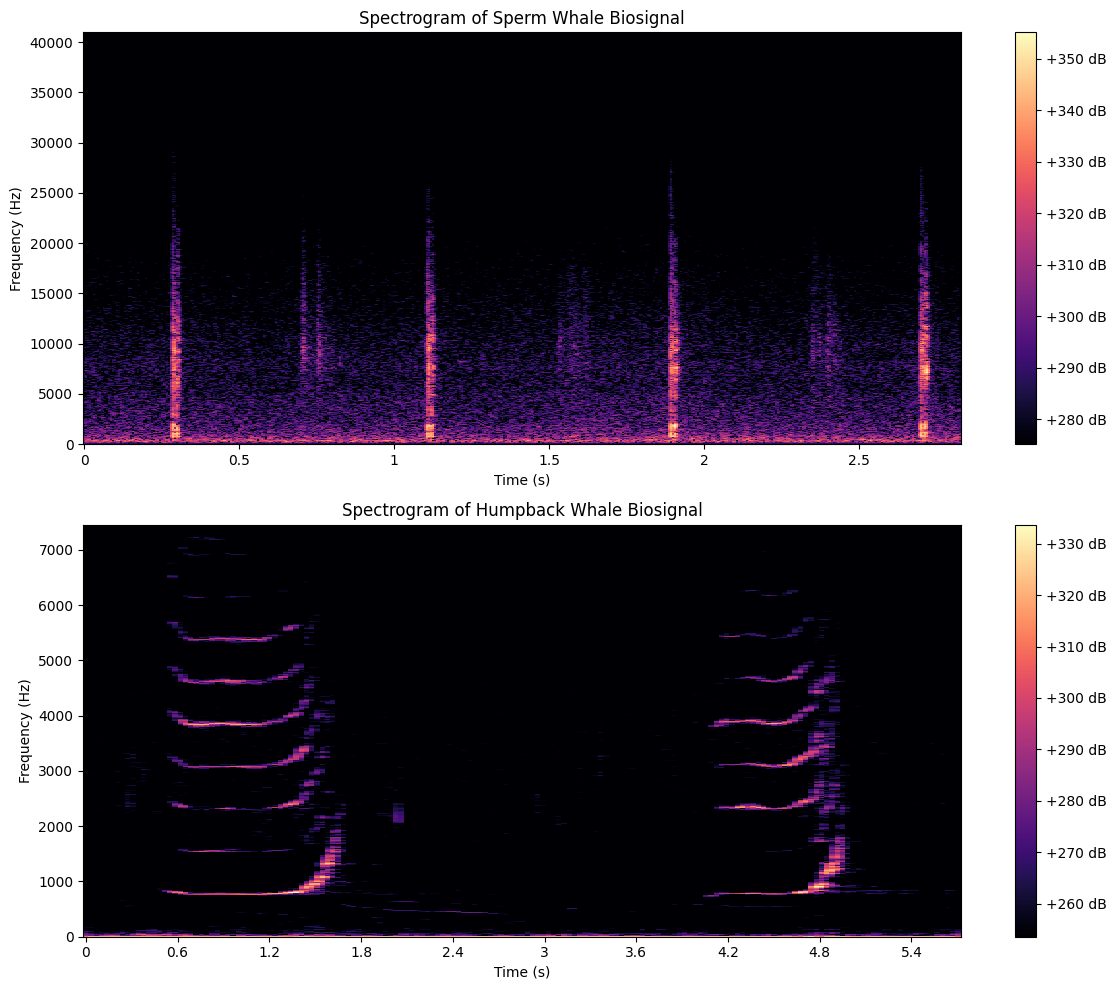

In [185]:
# Compute Short-Time Fourier Transform (STFT) for both signals
stft_sperm_whale = librosa.stft(pressure_sperm_whale)
stft_humpback_whale = librosa.stft(pressure_humpback_whale)

# Convert amplitude to dB scale
db_stft_sperm_whale = librosa.amplitude_to_db(np.abs(stft_sperm_whale) ** 2)
db_stft_humpback_whale = librosa.amplitude_to_db(np.abs(stft_humpback_whale) ** 2)

# Plot spectrogram for Sperm whale
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(
    db_stft_sperm_whale,
    sr=sr_sperm_whale,
    hop_length=hop_length,
    x_axis="time",
    y_axis="linear",
)
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Sperm Whale Biosignal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

# Plot spectrogram for Humpback whale
plt.subplot(2, 1, 2)
librosa.display.specshow(
    db_stft_humpback_whale,
    sr=sr_humpback_whale,
    hop_length=hop_length,
    x_axis="time",
    y_axis="linear",
)
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Humpback Whale Biosignal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


Το φασματογράφημα μας επιτρέπει να παρατηρήσουμε τόσο το συνολικό επίπεδο ενέργειας του σήματος (μέσω των διακυμάνσεων της έντασης) όσο και την παρουσία ταχέων αλλαγών ή ταλαντώσεων (μέσω των συνιστωσών συχνότητας). Συγκρίνοντας αυτό με τα αποτελέσματα TEO και STE, μπορούμε να επιβεβαιώσουμε τις παρατηρήσεις που έγιναν νωρίτερα σχετικά με την ευαισθησία στις γρήγορες αλλαγές και τη συνολική κατανομή ενέργειας.

## 3.10

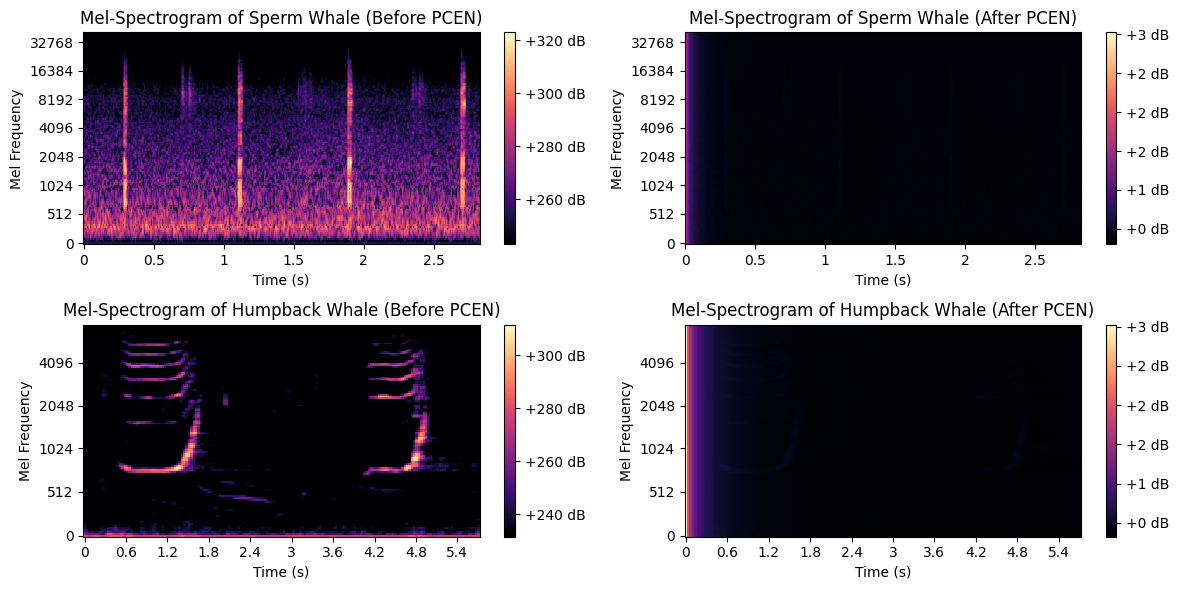

In [186]:
# Calculate mel-spectrograms for both signals
mel_spectrogram_sperm_whale = librosa.feature.melspectrogram(
    y=pressure_sperm_whale, sr=sr_sperm_whale
)
mel_spectrogram_humpback_whale = librosa.feature.melspectrogram(
    y=pressure_humpback_whale, sr=sr_humpback_whale
)

# Convert amplitude to dB scale
db_mel_spectrogram_sperm_whale = librosa.amplitude_to_db(mel_spectrogram_sperm_whale)
db_mel_spectrogram_humpback_whale = librosa.amplitude_to_db(
    mel_spectrogram_humpback_whale
)

# Apply PCEN
pcen_mel_spectrogram_sperm_whale = librosa.pcen(db_mel_spectrogram_sperm_whale)
pcen_mel_spectrogram_humpback_whale = librosa.pcen(db_mel_spectrogram_humpback_whale)

# Plot mel-spectrograms before and after applying PCEN
plt.figure(figsize=(12, 6))

# Sperm whale
plt.subplot(2, 2, 1)
librosa.display.specshow(
    db_mel_spectrogram_sperm_whale,
    sr=sr_sperm_whale,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram of Sperm Whale (Before PCEN)")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")

plt.subplot(2, 2, 2)
librosa.display.specshow(
    pcen_mel_spectrogram_sperm_whale,
    sr=sr_sperm_whale,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram of Sperm Whale (After PCEN)")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")

# Humpback whale
plt.subplot(2, 2, 3)
librosa.display.specshow(
    db_mel_spectrogram_humpback_whale,
    sr=sr_humpback_whale,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram of Humpback Whale (Before PCEN)")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")

plt.subplot(2, 2, 4)
librosa.display.specshow(
    pcen_mel_spectrogram_humpback_whale,
    sr=sr_humpback_whale,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram of Humpback Whale (After PCEN)")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")

plt.tight_layout()
plt.show()


Δεν ξέρω γιατί δεν βγάζει μετά το PCEN πιο καθαρά, κάπου υπάρχει λάθος.

Η εφαρμογή του PCEN ενισχύει την αντίθεση μεταξύ μεταβατικών παρασκηνίων (όπως σήματα από θαλάσσια θηλαστικά) και θορύβου περιβάλλοντος. Το PCEN το επιτυγχάνει κανονικοποιώντας προσαρμοστικά την ενέργεια κάθε καναλιού συχνότητας με βάση τις τοπικές στατιστικές, γεγονός που συμβάλλει στον μετριασμό των επιπτώσεων του θορύβου περιβάλλοντος και στη βελτίωση της ορατότητας των παροδικών χαρακτηριστικών.